In [1]:
import pyodbc
import pandas as pd
import seaborn as sns

server = "localhost,5432"
db_name = "ModMon"
driver = "/usr/local/lib/psqlodbcw.so"

cnxn = pyodbc.connect("DRIVER={" + driver + "};SERVER=" + server + ";DATABASE=" + db_name + ";Trusted_Connection=yes;")
cursor = cnxn.cursor()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
models = pd.read_sql('SELECT models.modelID, models.name, models.teamName, models.description, researchQuestions.description AS question FROM models, researchQuestions WHERE models.questionID=researchQuestions.questionID;', cnxn)
models

,modelid,name,teamname,description,question
0,1,wine-lightgbm,REG2,Model to assess wine quality,Investigate WHITE wine quality dataset
1,2,wine-R,REG2,Model to assess wine quality,Investigate WHITE wine quality dataset
2,3,WineQuality1,REG,Model to assess wine quality,Investigate wine quality dataset


Visualisation ideas
==

In [3]:
results = pd.read_sql('SELECT * FROM results;', cnxn)
results.head()

,modelid,modelversion,testdatasetid,isreferenceresult,runtime,runid,metric,value,valueerror,resultmessage
0,1,0.0.1,2,1,2020-07-11,1,correct_class,0.512000,None,None
1,1,0.0.1,2,1,2020-07-11,1,mean_log_loss,2.292328,None,None
2,2,0.0.1,4,1,2020-07-11,2,RMSE,0.740381,None,None
3,2,0.0.1,4,1,2020-07-11,2,Rsquare,0.332505,None,None
4,3,1.0.0,6,1,2020-07-11,3,training_time,0.021165,None,None


## View a particular model version - all metrics across time

- Use runID as a proxy for time

In [22]:
plot1_results = pd.read_sql("SELECT * FROM results WHERE modelID=3 AND modelVersion='1.1.0';", cnxn)

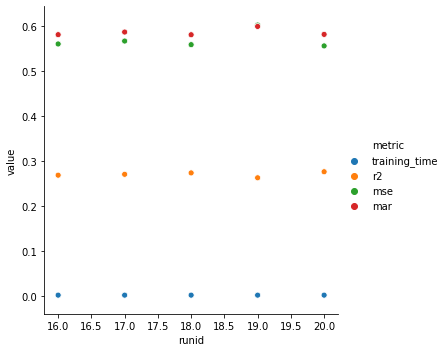

In [23]:
sns.relplot(x='runid', y='value', hue='metric', data=plot1_results)

## View a particular model - all metrics across versions

In [24]:
plot2_results = pd.read_sql("SELECT * FROM results WHERE modelID=3;", cnxn)

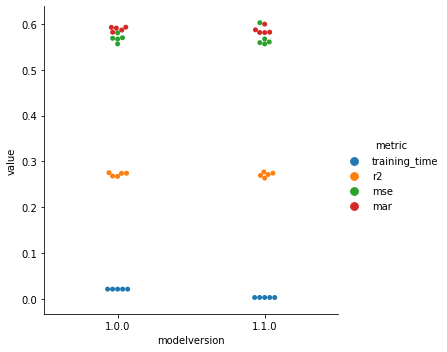

In [26]:
sns.catplot(x='modelversion', y='value', hue='metric', kind='swarm', data=plot2_results)

## View a particular research question - all models for a metric common to all across time

- Also inlcude model versions?

In [ ]:
###

## View a particular metric for a model across time and for different versions

In [29]:
plot3_results = pd.read_sql("SELECT * FROM results WHERE modelID=3 AND metric='r2';", cnxn)
plot3_results

,modelid,modelversion,testdatasetid,isreferenceresult,runtime,runid,metric,value,valueerror,resultmessage
0,3,1.0.0,6,1,2020-07-11 00:00:00.000000,3,r2,0.275405,None,None
1,3,1.0.0,6,1,2020-07-11 00:00:00.000000,12,r2,0.274225,None,None
2,3,1.0.0,15,0,2020-06-22 10:40:38.111182,13,r2,0.267426,None,None
3,3,1.0.0,16,0,2020-06-22 10:41:47.163820,14,r2,0.273996,None,None
4,3,1.0.0,17,0,2020-06-22 10:41:55.026495,15,r2,0.268136,None,None
5,3,1.1.0,19,1,2020-07-11 00:00:00.000000,16,r2,0.269389,None,None
6,3,1.1.0,20,0,2020-06-22 10:52:15.590548,17,r2,0.271383,None,None
7,3,1.1.0,21,0,2020-06-22 10:52:26.364253,18,r2,0.274502,None,None
8,3,1.1.0,22,0,2020-06-22 10:52:36.215912,19,r2,0.263649,None,None
9,3,1.1.0,23,0,2020-06-22 10:52:45.199244,20,r2,0.277086,None,None


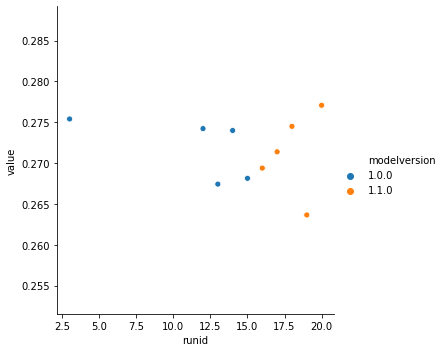

In [32]:
sns.relplot(x='runid', y='value', hue='modelversion', data=plot3_results)